# Step 3: Generate Vaping Messages via Neural Networks

## by: Sue Lim

Before reaching this notebook, I completed the following steps:

1. Decided vaping as a health topic
2. Scrapped vaping prevention messages via SNScrape
3. Selected 15 appropriate messages (ranked by retweetCount)

In this notebook, I generated messages via Bloom, a language model driven by Transformer neural network technology. 

I used Google Colab Pro+ acocunt to generate these messages because of the extra Ram stroage that comes with Google Colab Pro+ account. 

However, You **DO NOT** need Graphic Processing Unit (GPU), special technology available on Google Colab to use the Bloom language model. You can run the model on your own computer if you would like. That is the **BENEFIT** of using the Bloom language model. 

In [1]:
#Install transformers library

!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 64.4 MB/s eta 0:00:00


In [2]:
#Import the needed packages from the libraries

import transformers
from transformers import BloomForCausalLM, BloomTokenizerFast
import torch

In [3]:
#Import the chosen bloom model. Note that tehre are many different sizes of the Bloom model
#available in the HuggingFace website. bloom 7b1 is the second largest version of Bloom.
#There was not enough Ram storage for the largest bloom model.

tokenizer = BloomTokenizerFast.from_pretrained("bigscience/bloom-7b1")
bloom = BloomForCausalLM.from_pretrained("bigscience/bloom-7b1")

Downloading:   0%|          | 0.00/222 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/734 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/27.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.16G [00:00<?, ?B/s]

## Message generation

Now we are ready to generate vaping messages.

In [4]:
#Need to mount google drive to goole colab to be able to save AI-generated messages to google drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Import the necessary packages to generate messages

import pandas as pd
import os

In [ ]:
#Took prompt, starting from selected human-generated messages. This prompt is from message 1.
#The goal is to generate 100 messages per prompt. 

prompt = "Nicotine in vapes"

#Below, we specify to use pytorch machine learning framework. 
#You can also choose Tensorflow, but we use Pytorch here.

inputs = tokenizer(prompt, return_tensors="pt")

In [ ]:
#We generate 50 messages each time due to restrictions in Ram storage. 

sample_outputs = bloom.generate(inputs["input_ids"],
                       temperature = 0.7,
                       max_new_tokens = 60,
                       do_sample=True,
                       top_k=40, 
                       top_p=0.9,
                       num_return_sequences=50
                      )

print("Output:\n" + 100 * '-')
messages = []
for i, sample_output in enumerate(sample_outputs):
  generated_messages = tokenizer.decode(sample_output, skip_special_tokens=True)
  print("{}: {}".format(i, generated_messages))
  messages.append(generated_messages)

print(messages)

Output:
----------------------------------------------------------------------------------------------------
0: Nicotine in vapes is the most common chemical to be found in a vaping liquid. A variety of different nicotine strengths are available in the vape juice market, from low strengths to very high strengths. The lower strengths are often referred to as being “low nicotine” or “nicotine free”
1: Nicotine in vapes and cigars is a highly addictive drug. However, the nicotine content of e-cigarettes is much lower than the nicotine content of traditional cigarettes. It is estimated that the nicotine content of a typical e-cigarette is only about 10 to 20 percent of that
2: Nicotine in vapes is not as harmful as cigarettes. It’s just as addictive and as dangerous. The only difference is that the nicotine in vaping is a healthier alternative to smoking.
There are many different types of vapes. They all have their own advantages and disadvantages. It’s important to know the differences
3:

In [ ]:
#We save the AI-generated messages to google drive. 

AI_messages = pd.DataFrame(messages, columns = ['tweet'])
AI_messages.to_csv('Nicotine in vapes1.csv', index = False)

In [ ]:
#Then generate another 50 messages with prompt1 and then save to google drive.

AI_messages = pd.DataFrame(messages, columns = ['tweet'])
AI_messages.to_csv('Nicotine in vapes2.csv', index = False)

You will find the csv files with the AI-generated messages by clicking on the folder icon on the left menu bar (4th icon; see picture below):



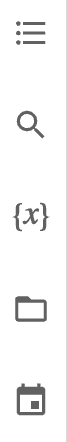


Download the 2 csv files, save them into the data -> 01_AI_generated_messages -> Nicotine in vapes folder. 

Let's continue generating messages with the next prompt. 

In [7]:
#This prompt is from message 2. #The goal is to generate 100 messages per prompt. 

prompt2 = "Vaping is risky"

#Below, we specify to use pytorch machine learning framework. 
#You can also choose Tensorflow, but we use Pytorch here.

inputs = tokenizer(prompt2, return_tensors="pt")

In [10]:
#We generate 50 messages each time due to restrictions in Ram storage. 

sample_outputs = bloom.generate(inputs["input_ids"],
                       temperature = 0.7,
                       max_new_tokens = 60,
                       do_sample=True,
                       top_k=40, 
                       top_p=0.9,
                       num_return_sequences=50
                      )

print("Output:\n" + 100 * '-')
messages = []
for i, sample_output in enumerate(sample_outputs):
  generated_messages = tokenizer.decode(sample_output, skip_special_tokens=True)
  print("{}: {}".format(i, generated_messages))
  messages.append(generated_messages)

print(messages)

Output:
----------------------------------------------------------------------------------------------------
0: Vaping is risky for children. It’s important to know what you should do if you suspect your child is using e-cigarettes.
1: Vaping is risky for your health. It is not only dangerous for your lungs, but it also damages your throat and mouth. When you vape, you get a nicotine hit, but you also get a lot of harmful chemicals and toxins in your system. That is why it is important to find the right
2: Vaping is risky for your health and your family’s health. It can be an addiction, and a habit that is difficult to break. You should always look for the best vaping products for your needs. We have created a list of the best vape mods that are available in the market today.
3: Vaping is risky and not for everybody. If you are unsure if you should start vaping, talk to your doctor. The vaping industry is very competitive and there are many companies that are trying to sell you on vapi

In [9]:
#We save the AI-generated messages to google drive. 

AI_messages = pd.DataFrame(messages, columns = ['tweet'])
AI_messages.to_csv('Vaping is risky1.csv', index = False)

In [11]:
#Then generate another 50 messages with prompt1 and then save to google drive.

AI_messages = pd.DataFrame(messages, columns = ['tweet'])
AI_messages.to_csv('Vaping is risky2.csv', index = False)

In [13]:
#This prompt is from message 3. #The goal is to generate 100 messages per prompt. 

prompt3 = "Vapes and e-cigarettes increase your risk"

#Below, we specify to use pytorch machine learning framework. 
#You can also choose Tensorflow, but we use Pytorch here.

inputs = tokenizer(prompt3, return_tensors="pt")

In [16]:
#We generate 50 messages each time due to restrictions in Ram storage. 

sample_outputs = bloom.generate(inputs["input_ids"],
                       temperature = 0.7,
                       max_new_tokens = 60,
                       do_sample=True,
                       top_k=40, 
                       top_p=0.9,
                       num_return_sequences=50
                      )

print("Output:\n" + 100 * '-')
messages = []
for i, sample_output in enumerate(sample_outputs):
  generated_messages = tokenizer.decode(sample_output, skip_special_tokens=True)
  print("{}: {}".format(i, generated_messages))
  messages.append(generated_messages)

print(messages)

Output:
----------------------------------------------------------------------------------------------------
0: Vapes and e-cigarettes increase your risk of cancer. The FDA is currently working on a new rule that will allow them to ban e-cigarettes, but there is no official date for the rule to be passed. This rule will only apply to e-cigarettes that contain nicotine. However, many people are still using them
1: Vapes and e-cigarettes increase your risk of lung and cardiovascular disease and may increase your risk of developing cancers of the mouth, throat, and esophagus.
2: Vapes and e-cigarettes increase your risk of lung cancer and heart disease. But the evidence is still unclear.
3: Vapes and e-cigarettes increase your risk of developing lung disease, lung cancer, and other respiratory conditions.
In addition, people who vape have a higher risk of having a stroke and heart attack, and there is an increased risk of having a seizure.
You may wonder how vaping and smoking are so simi

In [15]:
#We save the AI-generated messages to google drive. 

AI_messages = pd.DataFrame(messages, columns = ['tweet'])
AI_messages.to_csv('Vapes and e-cigarettes increase your risk1.csv', index = False)

In [17]:
#We save the AI-generated messages to google drive. 

AI_messages = pd.DataFrame(messages, columns = ['tweet'])
AI_messages.to_csv('Vapes and e-cigarettes increase your risk2.csv', index = False)

In [18]:
#This prompt is from message 4. #The goal is to generate 100 messages per prompt. 

prompt4 = "Vaping is anything but harmless"

#Below, we specify to use pytorch machine learning framework. 
#You can also choose Tensorflow, but we use Pytorch here.

inputs = tokenizer(prompt4, return_tensors="pt")

In [21]:
#We generate 50 messages each time due to restrictions in Ram storage. 

sample_outputs = bloom.generate(inputs["input_ids"],
                       temperature = 0.7,
                       max_new_tokens = 60,
                       do_sample=True,
                       top_k=40, 
                       top_p=0.9,
                       num_return_sequences=50
                      )

print("Output:\n" + 100 * '-')
messages = []
for i, sample_output in enumerate(sample_outputs):
  generated_messages = tokenizer.decode(sample_output, skip_special_tokens=True)
  print("{}: {}".format(i, generated_messages))
  messages.append(generated_messages)

print(messages)

Output:
----------------------------------------------------------------------------------------------------
0: Vaping is anything but harmless, particularly when it comes to children and adolescents. This is why it is imperative to look for the best vaporizer for kids. The following are some of the factors that you should consider when buying the best vaporizer for kids:
The first and foremost thing that you should look for when buying
1: Vaping is anything but harmless, especially if you are using an e-cigarette with nicotine. When you vape, you are inhaling a chemical mixture that is similar to that found in cigarettes. This is why you may be experiencing the same symptoms that you experience when you smoke a cigarette.
2: Vaping is anything but harmless, and vaping tobacco isn’t the exception. Vaping is a kind of nicotine delivery system that has been proven to be dangerous, and it is the primary reason why it is not a good idea to vape. While vaping is not a direct method of getti

In [20]:
#We save the AI-generated messages to google drive. 

AI_messages = pd.DataFrame(messages, columns = ['tweet'])
AI_messages.to_csv('Vaping is anything but harmless1.csv', index = False)

In [22]:
#We save the AI-generated messages to google drive. 

AI_messages = pd.DataFrame(messages, columns = ['tweet'])
AI_messages.to_csv('Vaping is anything but harmless2.csv', index = False)

In [25]:
#This prompt is from message 5. #The goal is to generate 100 messages per prompt. 

prompt5 = "The substances in e-cigarettes and their vapor include"

#Below, we specify to use pytorch machine learning framework. 
#You can also choose Tensorflow, but we use Pytorch here.

inputs = tokenizer(prompt5, return_tensors="pt")

In [28]:
#We generate 50 messages each time due to restrictions in Ram storage. 

sample_outputs = bloom.generate(inputs["input_ids"],
                       temperature = 0.7,
                       max_new_tokens = 60,
                       do_sample=True,
                       top_k=40, 
                       top_p=0.9,
                       num_return_sequences=50
                      )

print("Output:\n" + 100 * '-')
messages = []
for i, sample_output in enumerate(sample_outputs):
  generated_messages = tokenizer.decode(sample_output, skip_special_tokens=True)
  print("{}: {}".format(i, generated_messages))
  messages.append(generated_messages)

print(messages)

Output:
----------------------------------------------------------------------------------------------------
0: The substances in e-cigarettes and their vapor include nicotine, propylene glycol, glycerin, and flavorings. Nicotine is the primary addictive substance in e-cigarettes. It is a highly addictive drug. The amount of nicotine in e-cigarettes is not regulated by FDA. As a result, there
1: The substances in e-cigarettes and their vapor include many chemicals, including toxic chemicals, carcinogens, and substances that may be addictive. The vapor produced by e-cigarettes can be as toxic as or more toxic than tobacco smoke, and is sometimes more toxic than secondhand smoke. A number of e-cigarette liquids contain nicotine
2: The substances in e-cigarettes and their vapor include nicotine, propylene glycol, glycerin, and flavorings. The nicotine content of e-cigarettes is much lower than that of cigarettes, but it is still considered to be a poison. The nicotine content in e-cigaret

In [27]:
#We save the AI-generated messages to google drive. 

AI_messages = pd.DataFrame(messages, columns = ['tweet'])
AI_messages.to_csv('The substances in e-cigarettes and their vapor include1.csv', index = False)

In [29]:
#We save the AI-generated messages to google drive. 

AI_messages = pd.DataFrame(messages, columns = ['tweet'])
AI_messages.to_csv('The substances in e-cigarettes and their vapor include2.csv', index = False)

## Combine Excel Files

Now that the AI-messages are generated, we need to combine the two files for each of the 5 prompts.

This should be done in the Jupyter notebook.

In [1]:
#import required modules

import glob
import pandas as pd

In [8]:
#Combine two csv files with "Nicotine in vapes" prompt

# specifying the path to csv files
path1 = "/Users/suelim/anaconda3/Message_Engine3/data/NCA 2023/01_AI_generated_messages/Nicotine in vapes"

#csv files in the path
file_list = glob.glob(path1 + "/*.csv")

# list of excel files we want to merge.
# pd.read_excel(file_path) reads the excel
# data into pandas dataframe.
excl_list = []
 
for file in file_list:
    excl_list.append(pd.read_csv(file))
    
#create a new dataframe to store the merged excel file.
excl_merged = pd.DataFrame()
 
for excl_file in excl_list:
     
    # appends the data into the excl_merged
    # dataframe.
    excl_merged = excl_merged.append(
      excl_file, ignore_index=True)    
    
# exports the dataframe into excel file with specified name.
excl_merged.to_csv('/Users/suelim/anaconda3/Message_Engine3/data/01_AI_generated_messages/Nicotine in vapes/Nicotine in vapes.csv', index=False)

In [9]:
#Combine two csv files with "The substances in e-cigarettes and their vapor include" prompt

# specifying the path to csv files
path2 = "/Users/suelim/anaconda3/Message_Engine3/data/NCA 2023/01_AI_generated_messages/The substances in e-cigarettes and their vapor include"

#csv files in the path
file_list = glob.glob(path2 + "/*.csv")

# list of excel files we want to merge.
# pd.read_excel(file_path) reads the excel
# data into pandas dataframe.
excl_list = []
 
for file in file_list:
    excl_list.append(pd.read_csv(file))
    
#create a new dataframe to store the merged excel file.
excl_merged = pd.DataFrame()
 
for excl_file in excl_list:
     
    # appends the data into the excl_merged
    # dataframe.
    excl_merged = excl_merged.append(
      excl_file, ignore_index=True)    
    
# exports the dataframe into excel file with specified name.
excl_merged.to_csv('/Users/suelim/anaconda3/Message_Engine3/data/01_AI_generated_messages/The substances in e-cigarettes and their vapor include/The substances in e-cigarettes and their vapor include.csv', index=False)

In [11]:
#Combine two csv files with "Vapes and e-cigarettes increase your risk" prompt

# specifying the path to csv files
path3 = "/Users/suelim/anaconda3/Message_Engine3/data/NCA 2023/01_AI_generated_messages/Vapes and e-cigarettes increase your risk"

#csv files in the path
file_list = glob.glob(path3 + "/*.csv")

# list of excel files we want to merge.
# pd.read_excel(file_path) reads the excel
# data into pandas dataframe.
excl_list = []
 
for file in file_list:
    excl_list.append(pd.read_csv(file))
    
#create a new dataframe to store the merged excel file.
excl_merged = pd.DataFrame()
 
for excl_file in excl_list:
     
    # appends the data into the excl_merged
    # dataframe.
    excl_merged = excl_merged.append(
      excl_file, ignore_index=True)    
    
# exports the dataframe into excel file with specified name.
excl_merged.to_csv('/Users/suelim/anaconda3/Message_Engine3/data/01_AI_generated_messages/Vapes and e-cigarettes increase your risk/Vapes and e-cigarettes increase your risk.csv', index=False)

In [12]:
#Combine two csv files with "Vaping is anything but harmless" prompt

# specifying the path to csv files
path4 = "/Users/suelim/anaconda3/Message_Engine3/data/NCA 2023/01_AI_generated_messages/Vaping is anything but harmless"

#csv files in the path
file_list = glob.glob(path4 + "/*.csv")

# list of excel files we want to merge.
# pd.read_excel(file_path) reads the excel
# data into pandas dataframe.
excl_list = []
 
for file in file_list:
    excl_list.append(pd.read_csv(file))
    
#create a new dataframe to store the merged excel file.
excl_merged = pd.DataFrame()
 
for excl_file in excl_list:
     
    # appends the data into the excl_merged
    # dataframe.
    excl_merged = excl_merged.append(
      excl_file, ignore_index=True)    
    
# exports the dataframe into excel file with specified name.
excl_merged.to_csv('/Users/suelim/anaconda3/Message_Engine3/data/01_AI_generated_messages/Vaping is anything but harmless/Vaping is anything but harmless.csv', index=False)

In [13]:
#Combine two csv files with "Vaping is risky" prompt

# specifying the path to csv files
path5 = "/Users/suelim/anaconda3/Message_Engine3/data/NCA 2023/01_AI_generated_messages/Vaping is risky"

#csv files in the path
file_list = glob.glob(path5 + "/*.csv")

# list of excel files we want to merge.
# pd.read_excel(file_path) reads the excel
# data into pandas dataframe.
excl_list = []
 
for file in file_list:
    excl_list.append(pd.read_csv(file))
    
#create a new dataframe to store the merged excel file.
excl_merged = pd.DataFrame()
 
for excl_file in excl_list:
     
    # appends the data into the excl_merged
    # dataframe.
    excl_merged = excl_merged.append(
      excl_file, ignore_index=True)    
    
# exports the dataframe into excel file with specified name.
excl_merged.to_csv('/Users/suelim/anaconda3/Message_Engine3/data/01_AI_generated_messages/Vaping is risky/Vaping is risky.csv', index=False)